<a href="https://colab.research.google.com/github/krisibraynova01/Thesis_TechnicalUnifersityofSofia_Master/blob/main/SupplyChain_predictions_optimizing_shipping_and_delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [73]:
df = pd.read_csv("SupplyChain_preprocessed.csv")

<ipython-input-73-ca8d0b4c8251>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SupplyChain_preprocessed.csv")


In [74]:
df['Order Date']  = pd.to_datetime(df['Order Date'], errors='coerce')
df['Shipping Date']  = pd.to_datetime(df['Shipping Date'], errors='coerce')

In [75]:
df['Shipping Year'] = df['Shipping Date'].dt.year
df['Shipping Month'] = df['Shipping Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Days Between Order and Shipping'] = (df['Shipping Date'] - df['Order Date']).dt.days

In [76]:
df = df.fillna(df.median(numeric_only=True))

In [77]:
categorical_columns = ['Delivery Status', 'Shipping Mode', 'Order Region', 'Order State', 'Order City', 'Order Country', 'Customer City', 'Customer Country']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [78]:
df = df.apply(lambda x: x.astype('category').cat.codes if x.dtype == 'object' else x)

print(df)

        Type  Days for shipping (real)  Days for shipment (scheduled)  \
0          1                         3                              4   
1          3                         5                              4   
2          0                         4                              4   
3          1                         3                              4   
4          2                         2                              4   
...      ...                       ...                            ...   
180514     0                         4                              4   
180515     1                         3                              2   
180516     3                         5                              4   
180517     2                         3                              4   
180518     2                         4                              4   

        Benefit per order  Sales per customer  Delivery Status  \
0               91.250000          314.640015            

In [79]:
features  = [
    'Days for shipment (scheduled)',
    'Delivery Status',
    'Late_delivery_risk',
    'Category Id',
    'Shipping Mode',
    'Order Region',
    'Order State',
    'Order City',
    'Order Country',
    'Customer City',
    'Customer Country',
    'Shipping Year',
    'Shipping Month',
    'Order Year',
    'Order Month',
    'Days Between Order and Shipping'
]

In [80]:
target = 'Days for shipping (real)'

In [81]:
X = df[features]

In [82]:
y = df[target]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
model = LinearRegression()

In [86]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [87]:
y_pred = model.predict(X_test_scaled)

In [88]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.015140308906151817
Mean Absolute Error: 0.07165878059493412
R-squared: 0.9942581633147924


        Actual Days for Shipping  Predicted Days for Shipping  Difference
80120                          5                     5.037598   -0.037598
19670                          2                     2.013034   -0.013034
114887                         2                     2.043378   -0.043378
120110                         5                     5.037166   -0.037166
56658                          2                     2.044075   -0.044075
...                          ...                          ...         ...
6851                           4                     3.934373    0.065627
60364                          6                     5.959986    0.040014
71620                          1                     0.429274    0.570726
78089                          6                     5.962701    0.037299
153327                         2                     2.045296   -0.045296

[54156 rows x 3 columns]


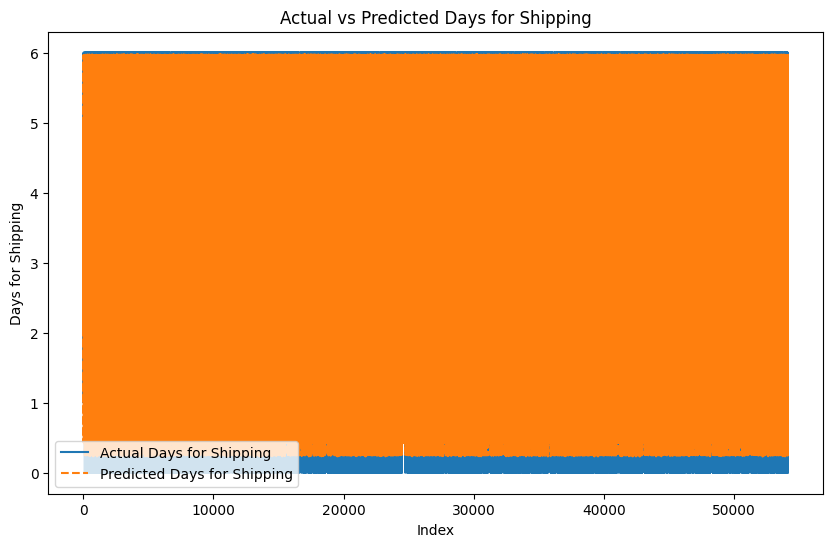

In [89]:
comparison_df = pd.DataFrame({
    'Actual Days for Shipping': y_test,
    'Predicted Days for Shipping': y_pred,
    'Difference': y_test - y_pred
})

print(comparison_df)

# Plotting actual vs predicted days for shipping
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Days for Shipping')
plt.plot(y_pred, label='Predicted Days for Shipping', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Days for Shipping')
plt.title('Actual vs Predicted Days for Shipping')
plt.legend()
plt.show()


In [90]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [91]:
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [92]:
y_pred = model.predict(X_test_scaled)

In [93]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.0005239134109111547
Mean Absolute Error: 0.0015844137409306808
R-squared: 0.9998013101805724


        Actual Days for Shipping  Predicted Days for Shipping  Difference
80120                          5                     4.999922    0.000078
19670                          2                     2.000264   -0.000264
114887                         2                     2.000970   -0.000970
120110                         5                     4.999880    0.000120
56658                          2                     2.000630   -0.000630
...                          ...                          ...         ...
6851                           4                     3.999956    0.000044
60364                          6                     5.999775    0.000225
71620                          1                     0.992191    0.007809
78089                          6                     5.999758    0.000242
153327                         2                     1.999777    0.000223

[54156 rows x 3 columns]


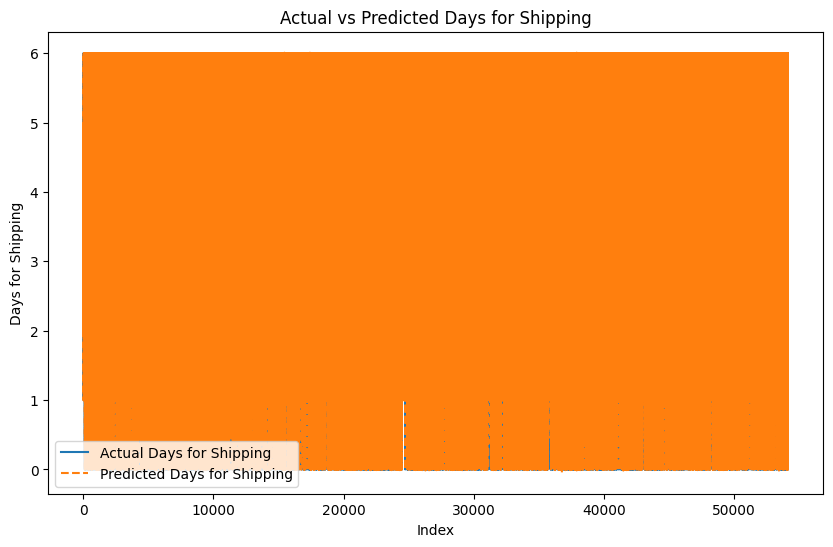

In [94]:
comparison_df = pd.DataFrame({
    'Actual Days for Shipping': y_test,
    'Predicted Days for Shipping': y_pred,
    'Difference': y_test - y_pred
})

print(comparison_df)

# Plotting actual vs predicted days for shipping
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Days for Shipping')
plt.plot(y_pred, label='Predicted Days for Shipping', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Days for Shipping')
plt.title('Actual vs Predicted Days for Shipping')
plt.legend()
plt.show()